### Install Non Built-in Libraries

In [1]:
# uncomment the following line code if emoji library not installed
# !pip install emoji

### Import Libraries

In [2]:
# for data reading and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for text cleaning
import re
import string
import emoji

# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# for saving the label encoder instant
import pickle

### Load Dataset

In [3]:
# read requested_dataset csv file as a dataframe
df = pd.read_csv('data/requested_dataset.csv')
df

,dialect,text
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,IQ,@KanaanRema مبين من كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458192,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


### Exploratory Data Analysis and Assessment

In [4]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   dialect  458197 non-null  object
 1   text     458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


In [5]:
# check NaNs
df.isnull().sum()

dialect    0
text       0
dtype: int64

In [6]:
# number of unique dialects
df['dialect'].nunique()

18

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

 -  -  -  -  -  -  -  -  -  - 



<AxesSubplot:>

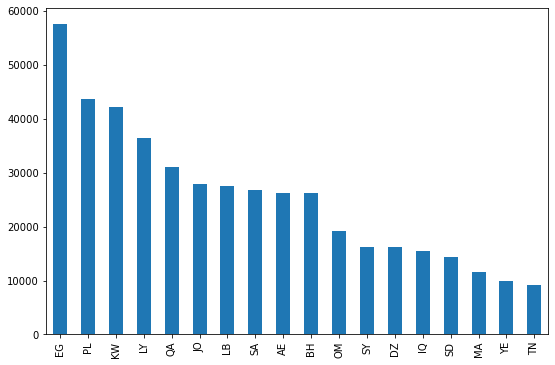

In [7]:
# number of records per each dialect
print(df['dialect'].value_counts())
print('\n' + ' - '*10 + '\n')
plt.figure(figsize=(9,6))
df['dialect'].value_counts().plot(kind='bar')

- imbalanced Dataset

In [8]:
# explore a random sample of 50 texts in our dataset
sample_index = df['text'].sample(50).keys()

# print each text 
for index in sample_index:
    text = df['text'].iloc[index]
    print(f'index {index}: {text}')

index 287950: المشكلة فعلا ان إنت مبقتش عارف تبدا منين. مبقتش لاقي نفسك
ضايع..مليون حاجة بتوقفك مليون حاجة بتشدك لتحت اكتر..
وانت بقيت اضعف من انك تقاوم.
index 331123: @Newq8bride ايييي قاعده اعدهم! وحده عدد كومنتاتها ١٩٠
عدد الكومنتات الصجيه ٣٤
index 310354: يلي بيسأل عنك مين.. بدنا نقلو إنت مييينك 💛 و #نصرالله_أشرف_منن 😌 https://t.co/RkocARKppA
index 33972: @fn86QP1OfTDstuQ من هذا المتخلف    فكر متحجر جامد  وان ركب الطيارة   امراض نفسية
index 20629: @Majeedeeb @5lishaa الله يبارك فيك ياغالي عليا راك تغيب ايوه
index 123451: يا جماعة هادا الراجل مجنووووووووووون ,, والله العظيم مجنون ,, 

مش هيك يا اخي :/ الله ينكبهم اليهود يا شيخ :P
index 24425: مفكره نفسها تلعب مع صديقتها تستاهل ليش تاخذ ولدها ههههه😂😂😂😂😂😂 https://t.co/OSQqheTmwO
index 369408: @eid_alshammariq كلك ذوق ربي يحفظك والدينك الجنه 🌹🌹
index 392936: @reham_rna ما بتحصلي الخازوق حقي
index 215115: @s2006t2013 @Uiob7 @ucMEMRpIpmKgbTD @hilalstuff قُصي فواز بالتيشرت النصراوي
index 445269: @FaisalDepp قلت الي في بالي
index 159866: ع

In [9]:
# let's discover the western arabian countries that speak Arabic with French
## Algeria
sample_index = df[df['dialect']=='DZ']['text'].sample(20).keys()

# print each text 
for index in sample_index:
    text = df['text'].iloc[index]
    print(f'index {index}: {text}')

index 244532: @Mohooll شنو لا 😒قلت اسمي قمر
index 233751: @SouihatKhaled ربي يشفيه ويعافيه ان شاء الله
index 231613: #بيت_الكل يا زينة 😍
@amelbouchoucha
index 241418: @misoufifi @Mina_Atta_ وانا واش نقول راجعلي ماعرفت نقول احلى والا اسوء ذكرياتي
index 236094: ماندي:
قديورة ماتخلينيش وحدي 😜
index 233371: أنتَي اوجاعي الحِلوه وغلطتي الصَح❤️.
انا مغرم ☺
index 234021: @faisal_aguero9 مدافع مكافح ومحارب اكتشاف مهم
index 236087: @NourAlgeria2 نوجد روحي،،،العام لي فات راطيتو ميش من عوايدي 😥
index 238095: @La__farf_alla اللهم امين يارب 🤲
ربي يحفظك ختيتو 😘
صباح الورد 🌺🌹
index 231082: @OsmaniAbdessam1 خليك ملي يحبو يزيدو عليها 😂
index 236210: @ahmed_radaideh جميل جدا هو والسيروكو
index 244436: @rihababb @Sarah41560955 عادي شو نعمللهت 🤔 لو افريم كنت طرت من لفرح
index 242321: ههه يهاوش جمهوره ويشكرهم ف نفس الوقت هههههه اروع جمهور ما يزعلون ههه #سنابات_غازي_المطيري
index 236564: @Walaa1720 فاتك ماتش كبييير يابنتي فيلم بوليسي فيلم اكشن فيلم رعب مش عارفة اقووووول اييه
index 236058: التاااالت يا صاحبي

In [10]:
## Tunisia
sample_index = df[df['dialect']=='TN']['text'].sample(20).keys()

# print each text 
for index in sample_index:
    text = df['text'].iloc[index]
    print(f'index {index}: {text}')

index 144072: @MervatSedik اهي 😁😁😁
وغلاف المرتبة باظ 
وشكلي هتعلق https://t.co/dl66Dqe1jQ
index 150916: #staracarabia عباس بصراحة طور برشا علي اول مادخل ويستاهل يوصل للفينال الحق يقال ربي يوفقهم الكل الحد الان الكل عجبوني ربي يكمل نسوم علي خير
index 148156: من هوني لآخر العام حاسس إلي باش يولـيو يطيشولنا في شكاير الروز و المقرونة بالطيارات 
#تفائل
🤣🤣🤣🤣🤔🤨🙄
index 151990: كما غنت أم كلثوم : إنت فين و الحب فين https://t.co/5MXfGQHhIL
index 145784: @shadounSelmi موش اول مرة صار هي 😂
ربي يشفيها 🤣🤣
index 147049: تحبوا تفهموا قضية التجسس اللي مقيمة القيامة؟ وتحبوا تفهموا علاقة هذا بكلام الغنوشي على الحرب الأهلية وتهديد وسائل... https://t.co/kLf3Kz2n6m
index 145849: @adore_u_elissa @elissakh مرحبا بيكم على راسي من فوق😍❤️
راكم تعبتوا برشا سخانة  و المدن بعاد على بعضهم😭
index 147211: هوساوي التبن الكوره سهله ليش التشتيت
index 146380: @mohamedmusic6 @wafaamohammed6 @KsaUvi @mossabry انا عن نفسي عندي مبدأ الباقي أحرار هم ينحملو ما يقولون 
وبعدين احنا نناقش شي معين ما دخل الرؤساء بالموضوع 
على العمو

In [11]:
## Morocco
sample_index = df[df['dialect']=='MA']['text'].sample(20).keys()

# print each text 
for index in sample_index:
    text = df['text'].iloc[index]
    print(f'index {index}: {text}')

index 181819: @monaliza5555 كاينة بعدا باش يكون عندها شي علم 😋 وراه ما كاين غير الافتراس خصوصا البابوش ممفكش انا وياه
index 183620: @faracha75153290 علاش 😕انا ديما حاضرة 🤷‍♀️نتي اللي غابرة اش خبارك لاباس توحشتك 😘😘😘
index 191712: #اكله_مغربيه_جديده البسطيلة بالكرعين😜
index 183296: @Aichaa__r راه هاذشي كان كيجيني غير تخاريف حتى لقيتها عندها في العاىلة وانا اخر وحدة تعرف😭😭😭😭😭😭
index 182156: @salmajd1 @Boughttat اولا ناس الرباط معمرهم يغلطوك هدي غير هدره خاوية تانيا أغلب لي يتلفوك في الرباط غير بساجي ماشي ولد الرباط وهدا الامر بحكم تجربتي مع بزااف ناس وفي الاخير طلع لي منعت ليهم غير جاي من قنت آخر مثلا تماره الصخيرات عين عودة القنيطرة ...
index 189229: @shadi778855 @dhaferlabidine ممثل غبي قال يعني عامل مسلسل لبناني على اساس العالم العربي بيتفرج على مسلسات لبنانية
index 190103: الليله 
Traduction مالكم مع 
والروسيه هههههه هباليتو مسبقين الفرح بليله
index 180338: @MaghribiaBlfor شكون قاليك هاد الهضرة ... انا مغربي و كانشجع النصر السعودي 🔥🔥🔥
index 182873: @SaadNBB هربو هربو، اش غادي ياخدو؟؟!

#### Notes
- Text must be cleaned and normalized
  - remove newlines & tabs '\n & \t'
  - remove tags & hashtags
  - remove emojis
  - remove links
  - remove punctuations
  - remove diacritics
  - remove numbers 'if exists'
  - remove English text 'if exists'
  - remove text elongation like 'ااااا & ههههه & ـــ'
  - text normalization
  - remove extra whitespaces
  

- Data should be balanced

##### N.B: Stopwords in most cases should be deleted, but in our case not preferred, as it has main words to differentiate between dialects such as months name and it's usage, so we will keep it.

### Data Cleaning and Text Normalization

#### Remove Newlines & Tabs '\n & \t'

In [12]:
# create function
def remove_newlines_tabs(text):
    return ' '.join(text.replace('\n', ' ').replace('\t',' ').split())

In [13]:
# test function
print('Before:', df['text'][150661])
print('After:', remove_newlines_tabs(df['text'][150661]))

Before: رح ياكلها ماجد ليوم #بروفا 
@Wissam_Sabbagh
After: رح ياكلها ماجد ليوم #بروفا @Wissam_Sabbagh


In [14]:
# apply on dataframe
df['text'] = df['text'].apply(remove_newlines_tabs)

#### Remove Tags & Hashtags

In [15]:
# create function
def remove_tages_hashtags(text):
    
    tag_hashtag_prefixes = ['@','#']

    # remove tags and hashtags
    words = []

    for word in text.split():
        word = word.strip()
        if len(word) != 1:
            if word[0] not in tag_hashtag_prefixes and word[1] not in tag_hashtag_prefixes: 
                words.append(word)
        else:
            if word[0] not in tag_hashtag_prefixes:
                words.append(word)
    return ' '.join(words)

In [16]:
# test function
print('Before:', df['text'][150661])
print('After:', remove_tages_hashtags(df['text'][150661]))

Before: رح ياكلها ماجد ليوم #بروفا @Wissam_Sabbagh
After: رح ياكلها ماجد ليوم


In [17]:
# apply on dataframe
df['text'] = df['text'].apply(remove_tages_hashtags)

#### Remove Emojis

In [18]:
# create function
def remove_emojis(text):
    return emoji.replace_emoji(text, '').replace('☻', ' ')

In [19]:
# test function
print('Before:', df['text'][188519])
print('After:', remove_emojis(df['text'][188519]))

Before: ☻☻☻ احم امولا نوبة 😹😹😹 https://t.co/uukomfZVRG
After:     احم امولا نوبة  https://t.co/uukomfZVRG


In [20]:
# apply on dataframe
df['text'] = df['text'].apply(remove_emojis)

#### Remove Links

In [21]:
# create function
def remove_links(text):
    return re.sub(r'https?:\/\/.*[\r\n]*', '', text)

In [22]:
# test function
print('Before:', df['text'][188519])
print('After:', remove_links(df['text'][188519]))

Before:     احم امولا نوبة  https://t.co/uukomfZVRG
After:     احم امولا نوبة  


In [23]:
# apply on dataframe
df['text'] = df['text'].apply(remove_links)

#### Remove Punctuations

In [24]:
# create punctuations list
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ»«•'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

# create function
def remove_punctuations(text):
    for punc in punctuations_list:
        text = text.replace(punc, '')
    return text

In [25]:
# test function
print('Before:', df['text'][79684])
print('After:', remove_punctuations(df['text'][79684]))

Before: آفا !!! اشتغلت على لسعوديين ربعك !!؟ معروف نيتكم من الاول تدمير السعودية .
After: آفا  اشتغلت على لسعوديين ربعك  معروف نيتكم من الاول تدمير السعودية 


In [26]:
# apply on dataframe
df['text'] = df['text'].apply(remove_punctuations)

#### Remove Diacritics

In [27]:
# all diacritics
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

# create function
def remove_diacritics(text):
    return re.sub(arabic_diacritics, '', text)

In [28]:
# test function
print('Before:', df['text'][145545])
print('After:', remove_diacritics(df['text'][145545]))

Before: توا وصلنا ل 67 مترشح للانتخابات الرئاسية حاجة تفرّح برشا و انا واحد من الناس نطالب باش يزيدو يمدّو في آخر اجل 
After: توا وصلنا ل 67 مترشح للانتخابات الرئاسية حاجة تفرح برشا و انا واحد من الناس نطالب باش يزيدو يمدو في آخر اجل 


In [29]:
# apply on dataframe
df['text'] = df['text'].apply(remove_diacritics)

#### Remove Numbers

In [30]:
# create function
def remove_numbers(text):
    return re.sub('\d+', '', text)

In [31]:
# test function
print('Before:', df['text'][144661])
print('After:', remove_numbers(df['text'][144661]))

Before: ههههههههههههه اهو دقني وشعري دة ميكونش على مرا لو الكلام دة حصل في 2018 ولا حتى 2180 حتى  
After: ههههههههههههه اهو دقني وشعري دة ميكونش على مرا لو الكلام دة حصل في  ولا حتى  حتى  


In [32]:
# apply on dataframe
df['text'] = df['text'].apply(remove_numbers)

#### Remove English Text 'if exists'

In [33]:
# create function
def remove_english(text):
    return re.sub('[A-Za-z]+', '', text)

In [34]:
# test function
print('Before:', 'أهلا ومرحبا Weclome to Eg ypt')
print('After:', remove_english('أهلا ومرحبا Weclome to Eg ypt'))

Before: أهلا ومرحبا Weclome to Eg ypt
After: أهلا ومرحبا    


In [35]:
# apply on dataframe
df['text'] = df['text'].apply(remove_english)

#### Remove Elongation

In [36]:
# create function
def remove_elongation(text):
    # remove هههه and خخخخ firstly
    text = re.sub(r'[ه]{3,}', '', text)
    text = re.sub(r'[خ]{2,}', '', text)
    
    # remove character elongation
    text = re.sub(r'[ـ]+', '', text)
    
    # remove character replicates
    return re.sub(r'(.)\1+', r'\1', text)

In [37]:
# test function 147774
print('Before:', 'لقد كنت ذاهـبــــا الاممس الى السووووق ههههههه')
print('After:', remove_elongation('لقد كنت ذاهـبــــا الاممس الى السووووق ههههههه'))
print()
print('Before:', df['text'][147774])
print('After:', remove_elongation(df['text'][147774]))

Before: لقد كنت ذاهـبــــا الاممس الى السووووق ههههههه
After: لقد كنت ذاهبا الامس الى السوق 

Before: انتظري مصادري عن صفقات النصر الأجنبيه خخخخخ
After: انتظري مصادري عن صفقات النصر الأجنبيه 


In [38]:
# apply on dataframe
df['text'] = df['text'].apply(remove_elongation)

#### Text Normalization

In [39]:
# create function
def normalize_text(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ڤ", "ف", text)
    text = re.sub("چ", "ج", text)
    text = re.sub("ژ", "ز", text)
    text = re.sub("پ", "ب", text)
    return text

In [40]:
# test function
print('Before:', df['text'][441147])
print('After:', normalize_text(df['text'][441147]))

Before: الحين إنتي ما تقولين ما لحقتي عليه شلون بتعرفين أسمه چان سألتي الوالدة أو أحد من مواليد الستينات أو يمكن السبعينات 
After: الحين انتي ما تقولين ما لحقتي عليه شلون بتعرفين اسمه جان سالتي الوالده او احد من مواليد الستينات او يمكن السبعينات 


In [41]:
# apply on dataframe
df['text'] = df['text'].apply(normalize_text)

#### Remove Extra Whitespaces

In [42]:
# create function
def remove_whitespaces(text):
    return ' '.join(text.strip().split())

In [43]:
# test function
print('Before:', 'تيكست  مليء    بالمسافات  التي  ليس لها داعي     ')
print('After:', remove_whitespaces('تيكست  مليء    بالمسافات  التي  ليس لها داعي     '))

Before: تيكست  مليء    بالمسافات  التي  ليس لها داعي     
After: تيكست مليء بالمسافات التي ليس لها داعي


In [44]:
# apply on dataframe
df['text'] = df['text'].apply(remove_whitespaces)

#### Re-check NaNs & Duplicates After Cleaning

In [45]:
# check empty text record
df[df['text']=='']

,dialect,text
1270,IQ,
1317,IQ,
2043,IQ,
2197,IQ,
2425,IQ,
...,...,...
454965,BH,
456554,BH,
456595,BH,
457751,BH,


In [46]:
# remove empty record by selecting the other one
df = df[df['text']!='']

In [47]:
# check duplicates
df['text'].duplicated().sum()

1556

In [48]:
# remove duplicates
df = df.drop_duplicates(subset=['text'])

### Data pre-processing

#### Encoding taget Label

In [49]:
# create lable encoding instant
le = LabelEncoder()

In [50]:
# label encode the dialect feature
df['target'] = le.fit_transform(df['dialect'])

In [51]:
# enconding order an classes
le.classes_

array(['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM',
       'PL', 'QA', 'SA', 'SD', 'SY', 'TN', 'YE'], dtype=object)

In [52]:
# save the label encoder to reuse in deployment
pickle.dump(le, open('models/labelencoder.pkl', 'wb'))

In [53]:
# drop dialect column 
df.drop('dialect', axis=1, inplace=True)

#### Train Test Split

- We are dealing with about 450K dataset record, so it would be better to split train to test as 95% to 5%, so:
  - The model would train well from the given data 
  - About 20k records would be eough to evaluate the model

In [54]:
# data splitting 
train, test = train_test_split(df, train_size=0.95, stratify=df['target'], random_state=123)

#### Data Balancing

- Firstly, we can remove data redundancy using different techniques, but it won't be effiective with our case, as we can deal with the same meaning sentences but differenct dialects, so will ignore this step.
- Secondly, the best way is to oversampling using `Synthetic Minority Over-sampling Technique`, we will add it to the model pipeline in next step  `Model Training`

##### N.B: Due to the large amount of the dataset, computational power resources are not enough and insufficient for oversampling step, so unfortunately it won't be done.

### Saving datasets

In [55]:
# save train and test datasets
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

### Done!